#COVID 19 DASHBOARD








Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).




# PREVENTION

To prevent infection and to slow transmission of COVID-19, do the following:

1.Wash your hands regularly with soap and water, or clean them with alcohol-based hand rub.
2.Maintain at least 1 metre distance between you and people coughing or sneezing.
3.Avoid touching your face.
4.Cover your mouth and nose when coughing or sneezing.
5.Stay home if you feel unwell.
6.Refrain from smoking and other activities that weaken the lungs.
7.Practice physical distancing by avoiding unnecessary travel and staying away from large groups of people

# SYMPTOMS

COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.

Most common symptoms:

fever.
dry cough.
tiredness.
Less common symptoms:

aches and pains.
sore throat.
diarrhoea.
conjunctivitis.
headache.
loss of taste or smell.
a rash on skin, or discolouration of fingers or toes.
Serious symptoms:

difficulty breathing or shortness of breath.
chest pain or pressure.
loss of speech or movement.

In [1]:

from IPython.display import Image

import json
import folium
import requests
import mimetypes
import http.client
import pandas as pd
import seaborn as sns
from folium.plugins import HeatMap
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt 

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import cv2
import ipywidgets as widgets



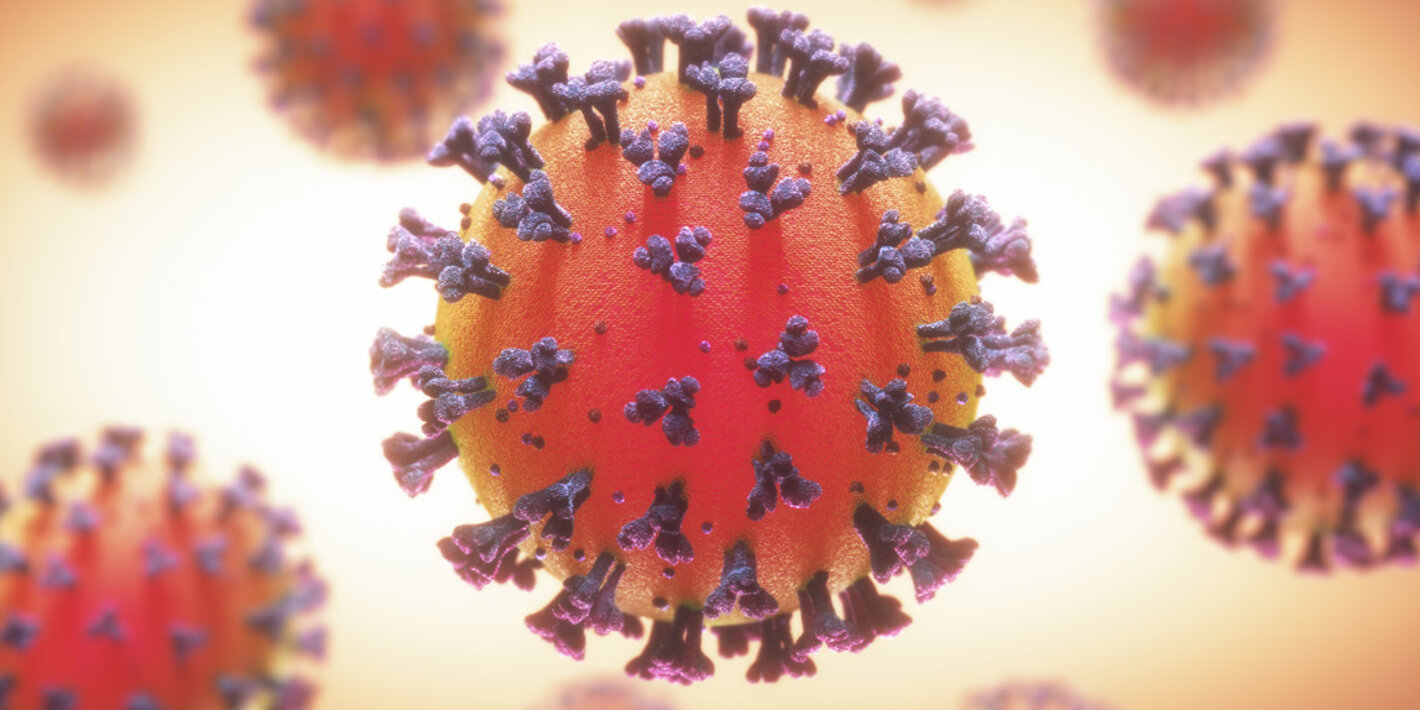

In [3]:

Image(filename='corona.jpg')



In [13]:
conn= http.client.HTTPSConnection("api.covid19api.com")          #specify the connection using an variable conn,api.covid19api.com is the url
payload=''                                                       # variable to hold data
headers={}                                                       # variable where algorithm is stored
conn.request("GET","/summary",payload,headers)                   # make the request to get the summary subset of entire dataset
res=conn.getresponse()                                           # getting response
data=res.read().decode('UTF-8')                                  # getting data in UTF-8 FORMAT

In [14]:
covid1=json.loads(data)                                         # DATA CONVERTED TO JSON FROM UTF -8 

In [15]:
pd.json_normalize(covid1['Countries'],sep=",")    ;          # NORMALIZE THE DATA

In [16]:
df=pd.DataFrame(covid1['Countries'])
df;

In [17]:
death=df.groupby('Date').sum()['TotalDeaths'].reset_index()
death;

In [18]:
covid2=df.drop(columns=['CountryCode','Slug','Date','Premium'],axis=1)
covid2;

In [19]:
m=folium.Map(tiles="Stamen Terrain" ,min_zoom=1.5)
m;

In [20]:
url='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes=f'{url}/world-countries.json'

In [21]:
folium.Choropleth(
  geo_data=country_shapes,
  min_zoom=2,
  name='COVID-19',
  data=covid2,
  columns=['Country','TotalConfirmed'],
  key_on='feature.properties.name',
  fill_color='OrRd',
  nan_fill_color='black',
  legend_name='Total Confirmed Covid Cases',
).add_to(m)                   # to generate chloropleth map layer on base map m to show the total confirmed cases

m;

In [22]:
covid2.update(covid2['TotalConfirmed'].map('Total Confirmed:{}'.format))
covid2.update(covid2['TotalRecovered'].map('Total Recovered:{}'.format))

In [23]:
coordinates=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/covid-map/master/country-coordinates-world.csv')                                       # import the cordinates of all countries in world map
coordinates;

In [24]:
covid_final=pd.merge(covid2,coordinates,on='Country')             # merge both the dataframes covid2 and coordinates with common attribute country in it to form a new  dataframe


In [42]:
sorted_country_df=covid_final.sort_values('NewConfirmed',ascending=False)

#  50 COUNTRIES HAVING MAXIMUM NEW CASES TODAY:

In [26]:
def highlights_col(x):
    r='background-color :red'
    g='background-color :green'
    b='background-color :blue'
    temp_df=pd.DataFrame('',index=x.index,columns=x.columns)
    temp_df.iloc[:,2] =b
    temp_df.iloc[:,4] =r
    temp_df.iloc[:,6]=g
    return temp_df
sorted_country_df.head(50).style.apply(highlights_col ,axis=None)

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,latitude,longitude
162,United States of America,172935,Total Confirmed:12591163,2146,259925,63064,Total Recovered:4696664,37.090240,-95.712891
72,India,44376,Total Confirmed:9222216,481,134699,37816,Total Recovered:8642771,20.593684,78.962880
124,Poland,32733,Total Confirmed:909066,540,14314,15849,Total Recovered:454717,51.919438,19.145136
23,Brazil,31100,Total Confirmed:6118708,630,170115,28461,Total Recovered:5509645,-14.235004,-51.925280
77,Italy,23227,Total Confirmed:1455022,853,51306,20837,Total Recovered:605330,41.871940,12.567380
149,Sweden,17265,Total Confirmed:225560,94,6500,0,Total Recovered:0,60.128161,18.643501
60,Germany,16370,Total Confirmed:963192,372,14832,18695,Total Recovered:649070,51.165691,10.451526
159,Ukraine,12526,Total Confirmed:665968,196,11619,8782,Total Recovered:312564,48.379433,31.165580
144,Spain,12228,Total Confirmed:1594844,537,43668,0,Total Recovered:150376,40.463667,-3.749220
161,United Kingdom,11344,Total Confirmed:1542611,608,55935,72,Total Recovered:3405,55.378051,-3.435973


In [27]:
def plotDot(point):
    folium.CircleMarker(location=[point.latitude,point.longitude],
    radius=5,
    weight=2,
    popup=[point.Country,point.TotalConfirmed,point.TotalRecovered],
    fill_color='#000000').add_to(m)
    

#                                           TOTAL CONFIRMED AND RECOVERED CASES 

In [28]:
covid_final.apply(plotDot,axis=1)
m.fit_bounds(m.get_bounds())
m

In [29]:
m1=folium.Map(tiles='StamenToner',min_zoom=2)
m1;

In [30]:
deaths=covid_final['TotalDeaths'].astype(float)


In [31]:
lat=covid_final['latitude'].astype(float)

In [32]:
lon=covid_final['longitude'].astype(float)

In [33]:
m1.add_child(HeatMap(zip(lat,lon,deaths),radius=0));

In [34]:
def plotDot(point):
    folium.CircleMarker(location=[point.latitude,point.longitude],
                       radius=5,
                       weight=2,
                       popup=[point.Country,point.TotalDeaths,point.NewDeaths],
                       fill_color='#000000').add_to(m1)


#                                            TOTAL DEATHS AND NEW DEATHS

In [35]:
covid_final.apply(plotDot,axis=1)
m1.fit_bounds(m1.get_bounds())
m1

# TOP 10 COUNTRIES HAVING MAXIMUM RECOVERIES TODAY:

In [36]:
covid3=covid_final.sort_values('NewRecovered',ascending=False)
covid3;

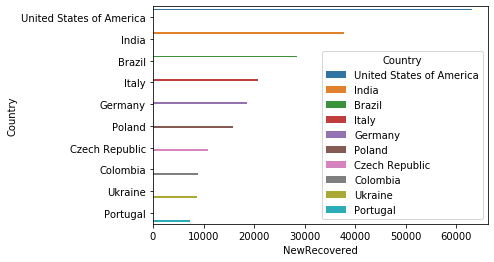

In [37]:
ax=sns.barplot(x='NewRecovered',y='Country',hue='Country',data=covid3.head(10))

# COUNTRIES HAVING MAXIMUM NEW DEATHS TODAY

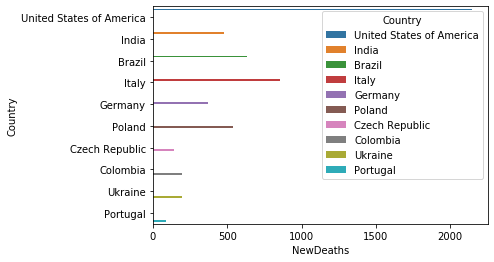

In [38]:
px=sns.barplot(x='NewDeaths',y='Country',hue='Country',data=covid3.head(10))

TypeError: bar() got multiple values for argument 'x'